# **Course 3 Automatidata project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

# **PACE stages** 


<img src="images/Pace.png" width="100" height="100" align=left>

   *        [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
   *        [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
   *        [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
   *        [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

Best Methods to identify outliers:

1. Use numpy functions to investigate the mean() and median() of the data and understand range of data values
2. Use a boxplot to visualize the distribution of the data
3. Use histograms to visualize the distribution of the data

How do you make the decision to keep or exclude outliers from any future models?

1. There are three main options for dealing with outliers: keeping them as they are, deleting them, or reassigning them. Whether you keep outliers as they are, delete them, or reassign values is a decision that you make taking into account the nature of the outlying data and the assumptions of the model you are building. To help you make the decision, you can start with these general guidelines:

2. Delete them: If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least.

3. Reassign them: If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values.

4. Leave them: For a dataset that you plan to do EDA/analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in.


In [84]:
# Import packages and libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [85]:
# Load dataset into dataframe
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: Analyze 



In [86]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [87]:
df.shape

(22699, 18)

In [88]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [90]:
df.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

There is no missing data according to the results from the info() and isna() function. 

Select visualization type(s)

As you'll see below, a bar chart, box plot and scatter plot will be most helpful in your understanding of this data.

A box plot will be helpful to determine outliers and where the bulk of the data points reside in terms of trip_distance, duration, and total_amount

A scatter plot will be helpful to visualize the trends and patters and outliers of critical variables, such as trip_distance and total_amount

A bar chart will help determine average number of trips per month, weekday, weekend, etc.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: Construct 

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### Task 3. Data visualization



### Boxplots

In [91]:
# Convert data columns to datetime
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])
df.dtypes

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

**trip distance**

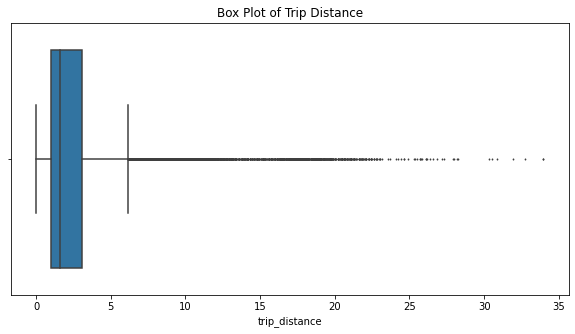

In [92]:
# Create box plot of trip_distance

plt.figure(figsize=(10,5))            
sns.boxplot(data=df, x='trip_distance', fliersize=1)
plt.title('Box Plot of Trip Distance');


Text(0.5, 1.0, 'Histogram of Trip Distance')

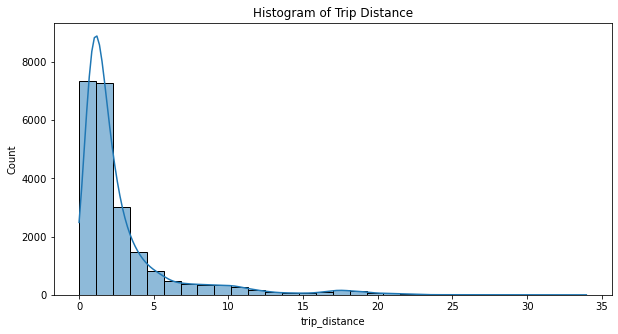

In [93]:
# Create histogram of trip_distance
plt.figure(figsize=(10,5))
sns.histplot(df, x='trip_distance', bins=30, kde=True )
plt.title('Histogram of Trip Distance')

The majority of trips were journeys of less than two miles. The number of trips falls away steeply as the distance traveled increases beyond two miles.

**total amount**

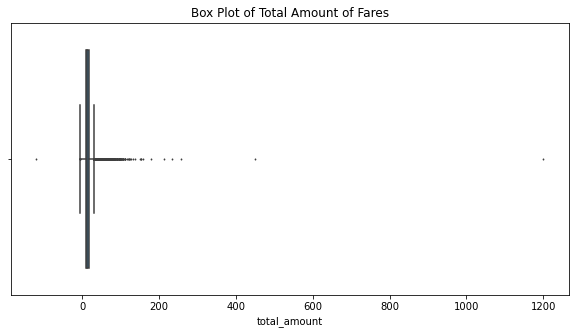

In [94]:
# Create box plot of total_amount
plt.figure(figsize=(10,5))            
sns.boxplot(data=df, x='total_amount', fliersize=1)
plt.title('Box Plot of Total Amount of Fares');

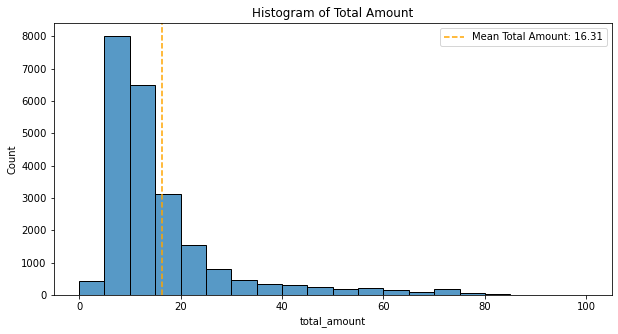

In [95]:
# Create histogram of total_amount
plt.figure(figsize=(10,5))
sns.histplot(df['total_amount'], bins=range(0,101,5))
plt.title('Histogram of Total Amount');

# Calculate mean of total_amount and mean line in orange color
mean_total_amount = np.mean(df['total_amount'])
plt.axvline(x=mean_total_amount, color='orange', linestyle='--', label=f'Mean Total Amount: {mean_total_amount:.2f}')
plt.legend()
plt.show()

The total cost of each trip also has a distribution that skews right, with most costs falling in the $5-15 range.

**tip amount**

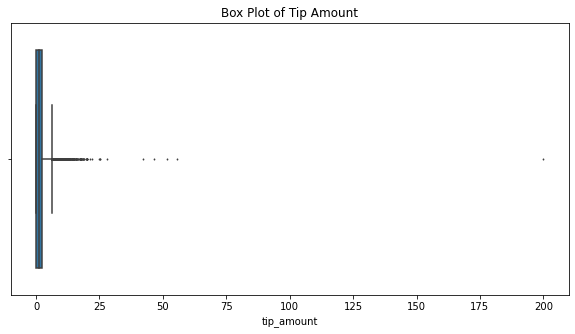

In [96]:
# Create box plot of tip_amount
plt.figure(figsize=(10,5))            
sns.boxplot(data=df, x='tip_amount', fliersize=1)
plt.title('Box Plot of Tip Amount');

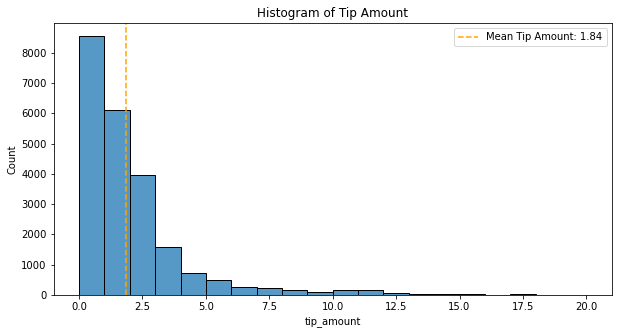

In [97]:
# Create histogram of tip_amount
plt.figure(figsize=(10,5))
sns.histplot(df['tip_amount'], bins=range(0,21,1))
plt.title('Histogram of Tip Amount');

# Calculate mean of tip_amount and mean line in orange color
mean_tip_amount = np.mean(df['tip_amount'])
plt.axvline(x=mean_tip_amount, color='orange', linestyle='--', label=f'Mean Tip Amount: {mean_tip_amount:.2f}')
plt.legend()
plt.show()

The distribution for tip amount is right-skewed, with nearly all the tips in the $0-3 range.

**tip_amount by vendor**

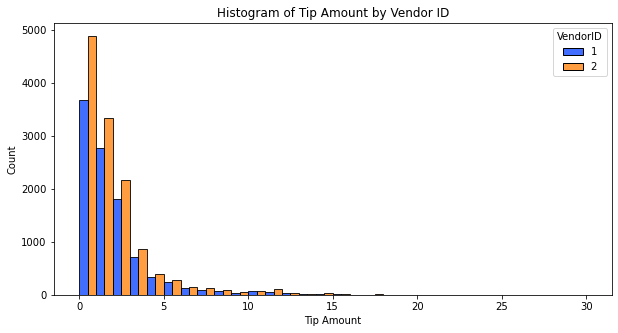

In [98]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='tip_amount', hue='VendorID', multiple='dodge', palette='bright', bins=range(0,31,1))

# Add labels and title
plt.xlabel('Tip Amount')
plt.ylabel('Count')
plt.title('Histogram of Tip Amount by Vendor ID')
plt.show()


Separating the tip amount by vendor reveals that there are no noticeable aberrations in the distribution of tips between the two vendors in the dataset. Vendor two has a slightly higher share of the rides, and this proportion is approximately maintained for all tip amounts.

Next, zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips.

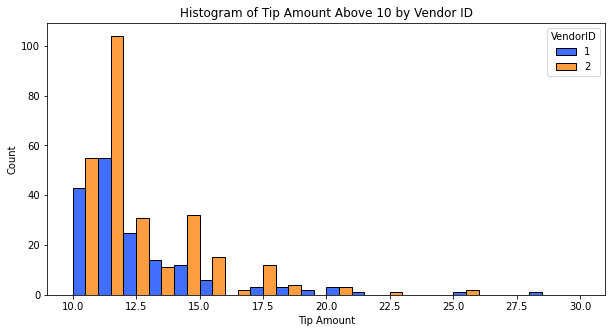

In [99]:
# Create histogram of tip_amount by vendor for tips > $10 
tip_more=df[df['tip_amount'] > 10]
plt.figure(figsize=(10,5))
sns.histplot(data=tip_more, x='tip_amount', hue='VendorID', multiple='dodge', palette='bright', bins=range(10,31,1))

# Add labels and title
plt.xlabel('Tip Amount')
plt.ylabel('Count')
plt.title('Histogram of Tip Amount Above 10 by Vendor ID')
plt.show()


The proportions are maintained even at these higher tip amounts, with the exception being at highest extremity, but this is not noteworthy due to the low sample size at these tip amounts.

**Mean tips by passenger count**

Examine the unique values in the `passenger_count` column.

In [100]:
df['passenger_count'].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

Nearly two thirds of the rides were single occupancy, though there were still nearly 700 rides with as many as six passengers. Also, there are 33 rides with an occupancy count of zero, which doesn't make sense. These would likely be dropped unless a reasonable explanation can be found for them

In [101]:
# Calculate mean tips by passenger_count
mean_tips_passenger= df.groupby('passenger_count')['tip_amount'].mean().reset_index()
mean_tips_passenger

,passenger_count,tip_amount
0,0,2.135758
1,1,1.848920
2,2,1.856378
3,3,1.716768
4,4,1.530264
5,5,1.873185
6,6,1.720260


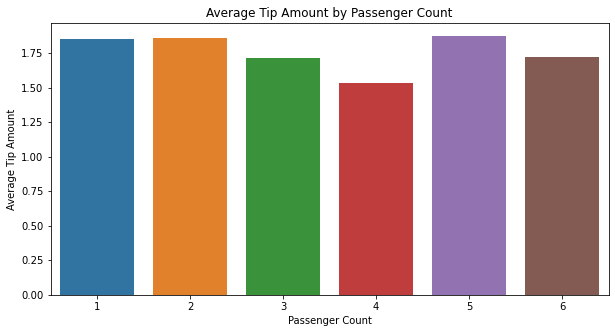

In [102]:
# Create bar plot for mean tips by passenger count
plt.figure(figsize=(10,5))
sns.barplot(x='passenger_count', y='tip_amount', data=mean_tips_passenger.tail(-1))

# Add labels and title
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Amount')
plt.title('Average Tip Amount by Passenger Count')

# Show the plot
plt.show()


Mean tip amount varies very little by passenger count. Although it does drop noticeably for four-passenger rides, it's expected that there would be a higher degree of fluctuation because rides with four passengers were the least plentiful in the dataset (aside from rides with zero passengers).

**Create month and day columns**

In [103]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name() 


# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday


**Plot total ride count by month**

Begin by calculating total ride count by month.

In [104]:
#Total ride count by month
ride_monthly = df['month'].value_counts()
ride_monthly

March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: month, dtype: int64

Reorder the results to put the months in calendar order.

In [105]:
# Reorder the monthly ride list so months go in order
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", 
               "December"]



In [106]:
# Show the index
ride_order=ride_monthly.reindex(index=month_order)
ride_order

January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: month, dtype: int64

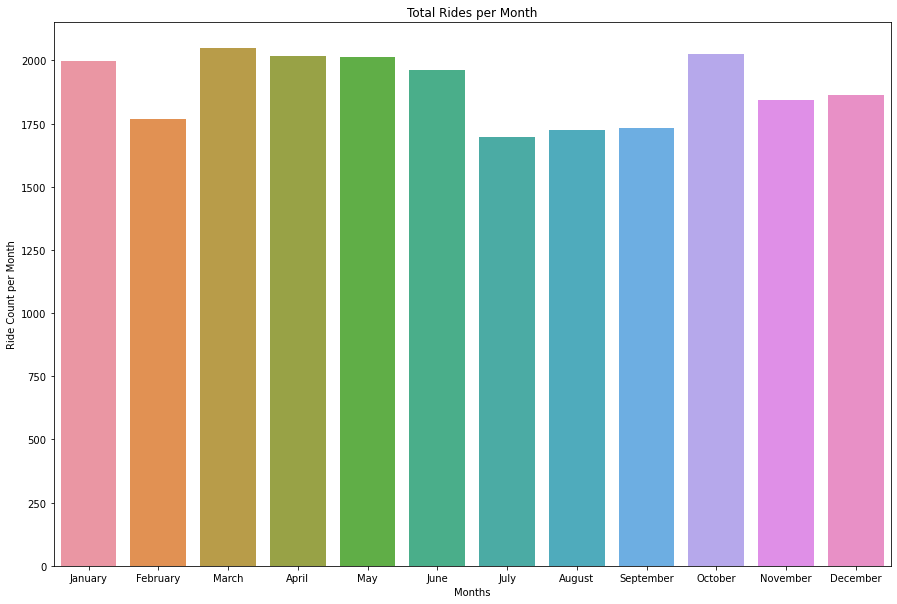

In [107]:
# Create a bar plot of total rides per month
plt.figure(figsize=(15,10))
sns.barplot(x=ride_order.index, y=ride_order)

# Add labels and title
plt.xlabel('Months')
plt.ylabel('Ride Count per Month')
plt.title('Total Rides per Month')

# Show the plot
plt.show()


Monthly rides are fairly consistent, with notable dips in the summer months of July, August, and September, and also in February.

**Plot total ride count by day**

Repeat the above process, but now calculate the total rides by day of the week.

In [108]:
# Repeat the above process, this time for rides by day
ride_daily = df['day'].value_counts()


In [109]:
# Reorder the daily ride list in a week in order
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday",
               "Sunday"]
# Show the index
ride_day_order=ride_daily.reindex(index=day_order)
ride_day_order


Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: day, dtype: int64

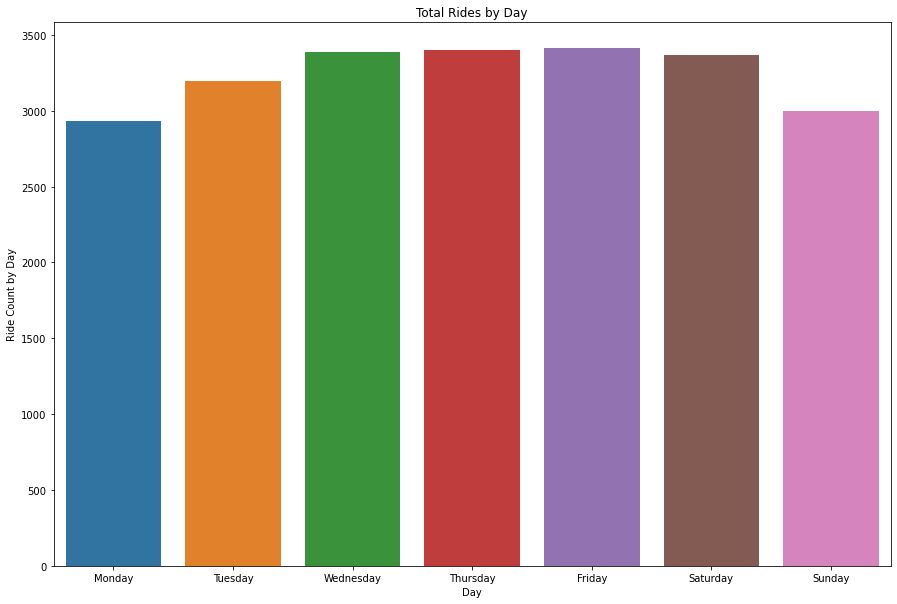

In [110]:
# Create bar plot for ride count by day

plt.figure(figsize=(15,10))
sns.barplot(x=ride_day_order.index, y=ride_day_order)

# Add labels and title
plt.xlabel('Day')
plt.ylabel('Ride Count by Day')
plt.title('Total Rides by Day')

# Show the plot
plt.show()

Suprisingly, Wednesday through Saturday had the highest number of daily rides, while Sunday and Monday had the least.

**Plot total revenue by day of the week**

Repeat the above process, but now calculate the total revenue by day of the week.

In [111]:
# Repeat the process, this time for total revenue by day
total_amount_day= df.groupby('day')['total_amount'].sum()
day_amount= total_amount_day.reindex(index=day_order)
day_amount

day
Monday       49574.37
Tuesday      52527.14
Wednesday    55310.47
Thursday     57181.91
Friday       55818.74
Saturday     51195.40
Sunday       48624.06
Name: total_amount, dtype: float64

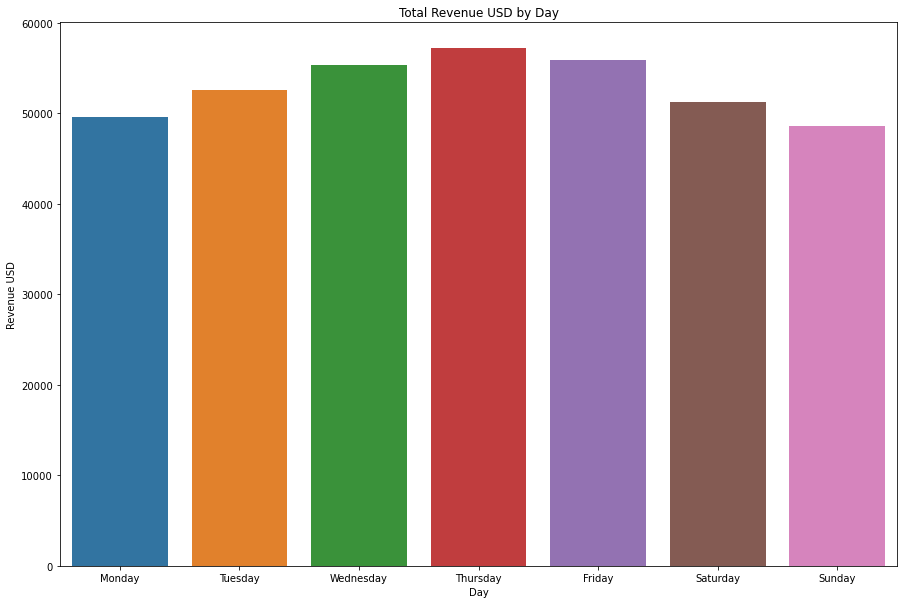

In [112]:
# Create bar plot of total revenue by day
plt.figure(figsize=(15,10))
sns.barplot(x=day_amount.index, y=day_amount)

# Add labels and title
plt.xlabel('Day')
plt.ylabel('Revenue USD')
plt.title('Total Revenue USD by Day')

# Show the plot
plt.show()


Thursday had the highest gross revenue of all days, and Sunday and Monday had the least. Interestingly, although Saturday had only 35 fewer rides than Thursday, its gross revenue was ~$6,000 less than Thursday's—more than a 10% drop.


**Plot total revenue by month**

In [113]:
# Repeat the process, this time for total revenue by month
total_month= df.groupby('month')['total_amount'].sum()
month_amount= total_month.reindex(index=month_order)
month_amount

month
January      31735.25
February     28937.89
March        33085.89
April        32012.54
May          33828.58
June         32920.52
July         26617.64
August       27759.56
September    28206.38
October      33065.83
November     30800.44
December     31261.57
Name: total_amount, dtype: float64

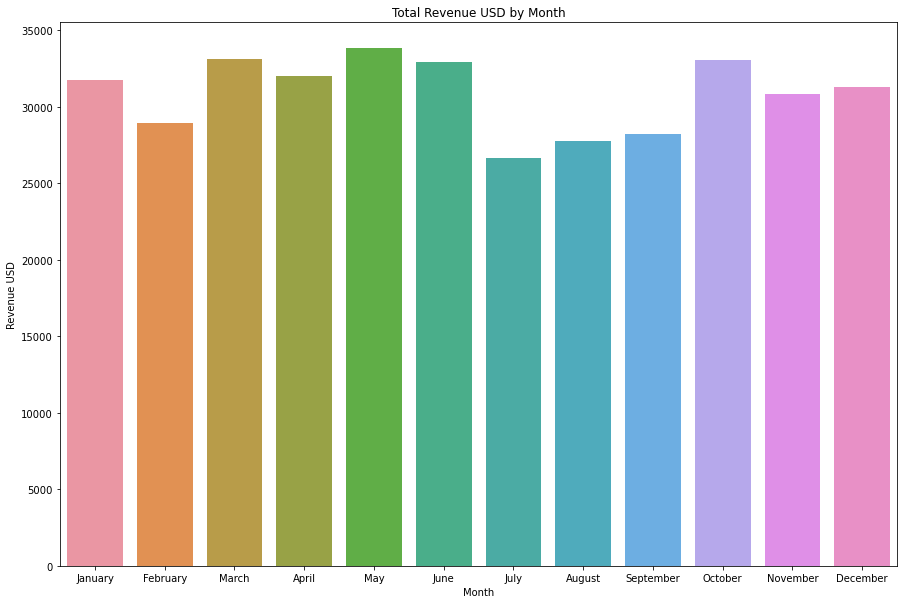

In [114]:
# Create a bar plot of total revenue by month
plt.figure(figsize=(15,10))
sns.barplot(x=month_amount.index, y=month_amount)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Revenue USD')
plt.title('Total Revenue USD by Month')

# Show the plot
plt.show()


Monthly revenue generally follows the pattern of monthly rides, with noticeable dips in the summer months of July, August, and September, and also one in February.


#### Scatter plot

**Plot mean trip distance by drop-off location**

In [115]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday


In [116]:
# Get number of unique drop-off location IDs
df['DOLocationID'].nunique()

216

In [122]:
# Calculate the mean trip distance for each drop-off location
mean_distance=df.groupby('DOLocationID')['trip_distance'].mean().sort_values(ascending=True)
mean_distance
# Sort the results in descending order by mean trip distance
#==> ENTER YOUR CODE HERE


DOLocationID
207     1.200000
193     1.390556
237     1.555494
234     1.727806
137     1.818852
         ...    
51     17.310000
11     17.945000
210    20.500000
29     21.650000
23     24.275000
Name: trip_distance, Length: 216, dtype: float64

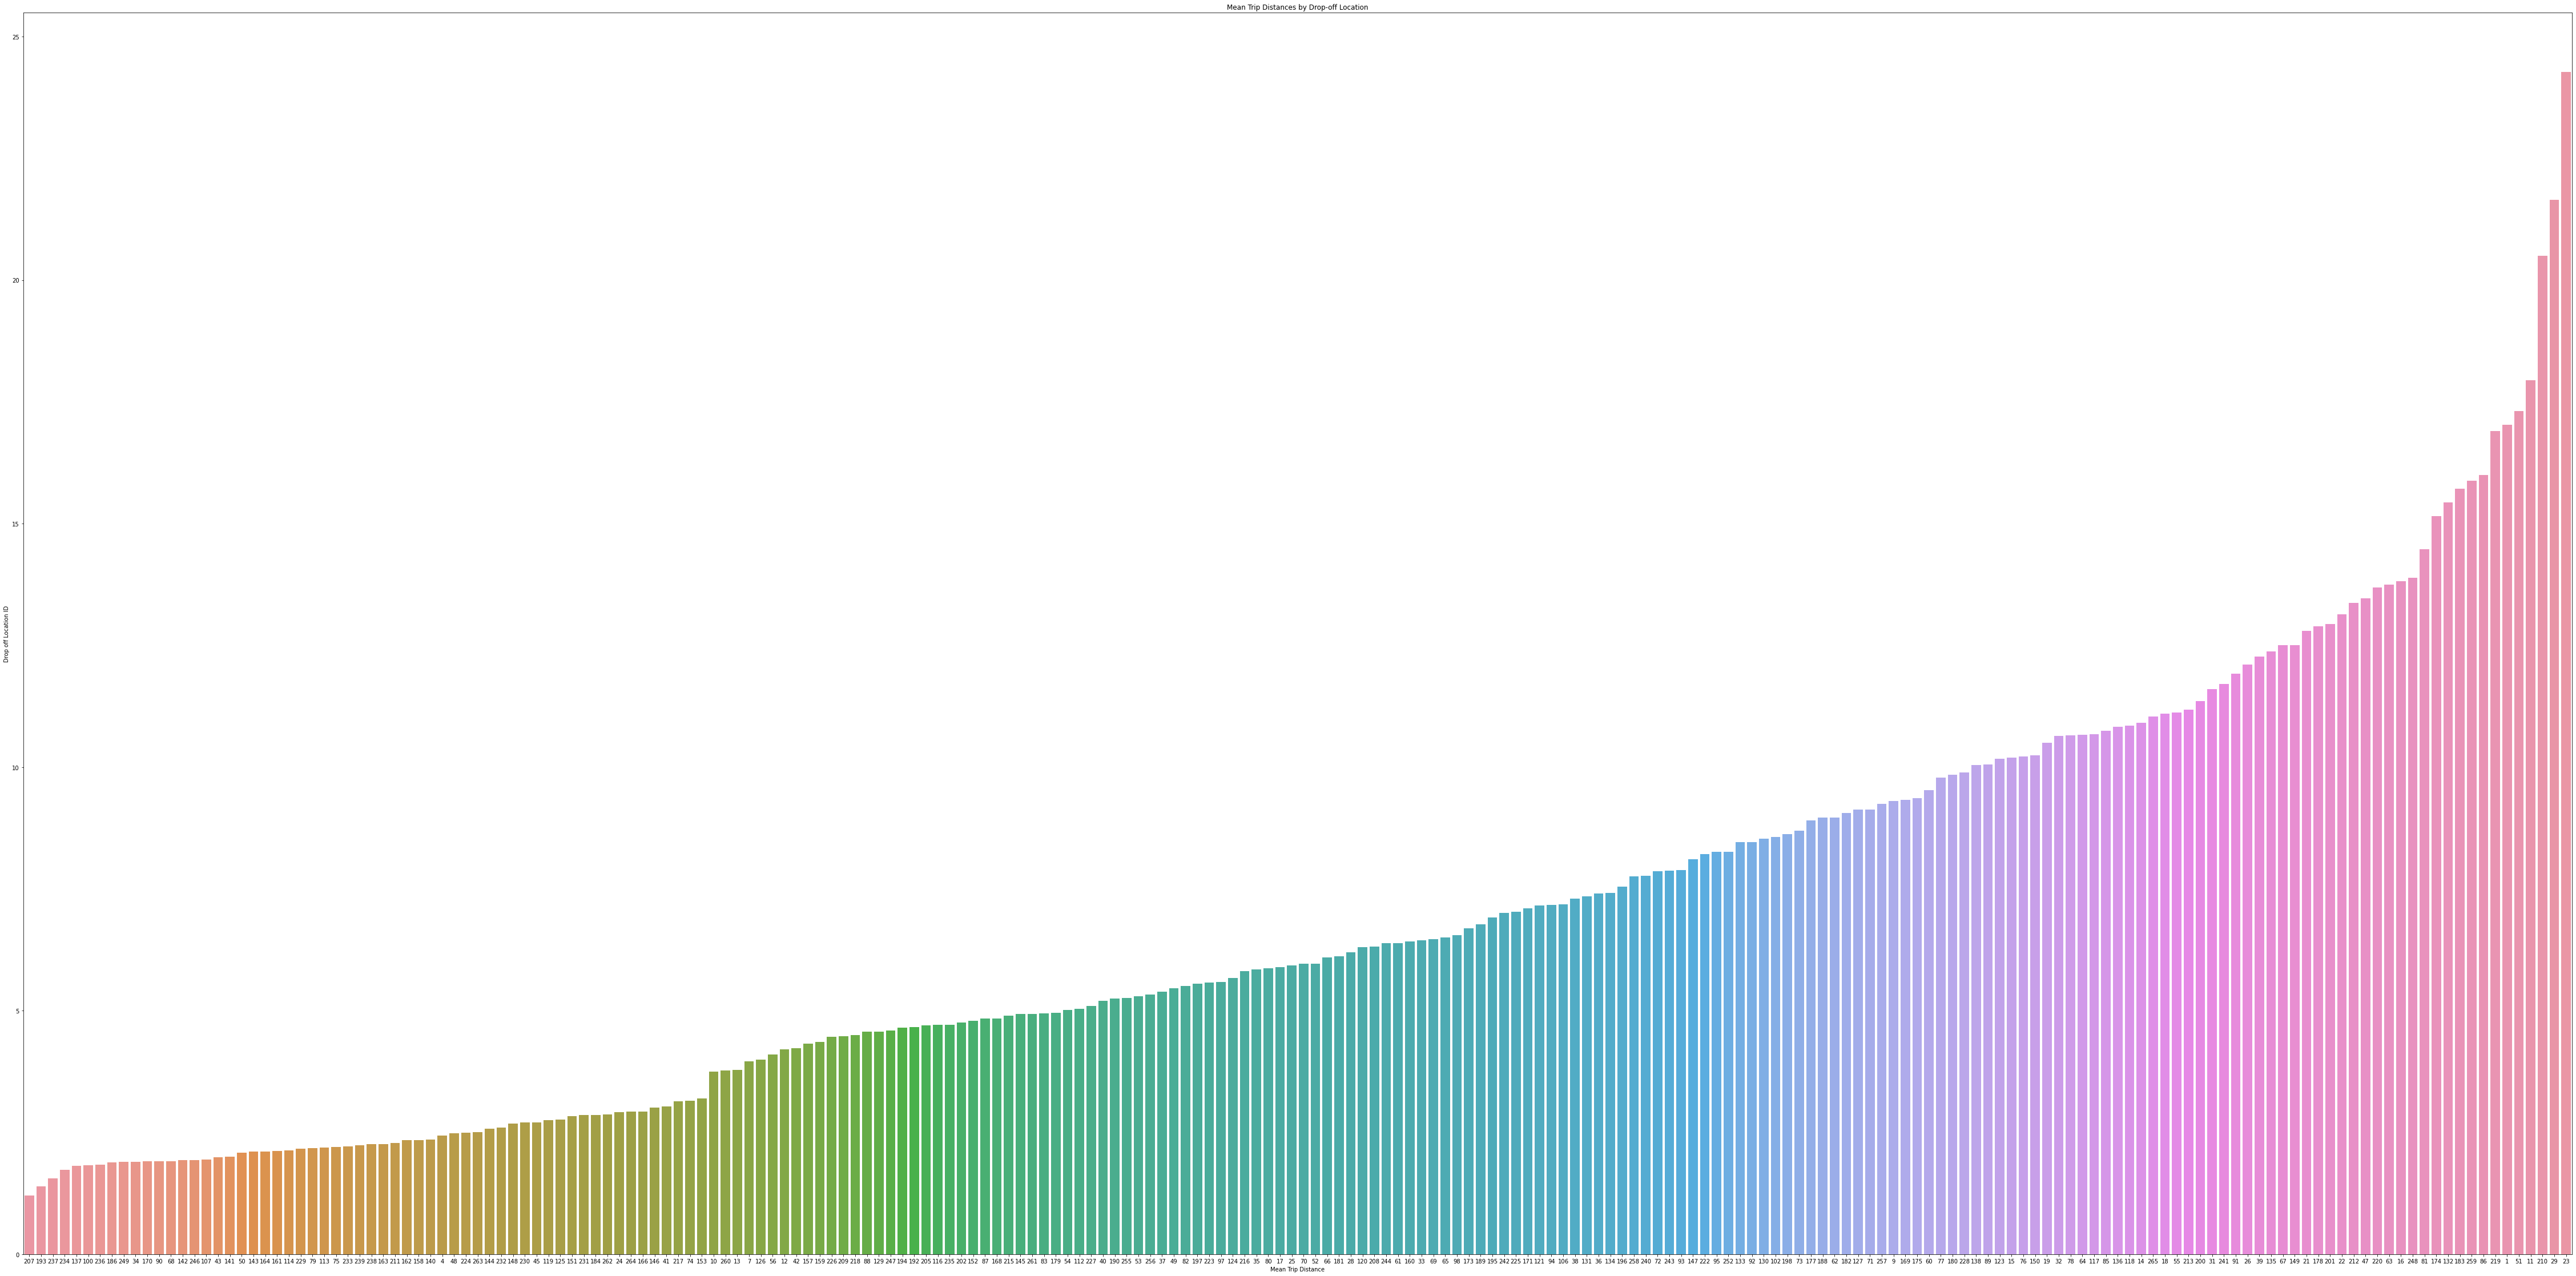

In [123]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(80,40))
sns.barplot(x=mean_distance.index, y=mean_distance, order=mean_distance.index)

# Add labels and title
plt.xlabel('Mean Trip Distance')
plt.ylabel('Drop off Location ID')
plt.title('Mean Trip Distances by Drop-off Location')

# Show the plot
plt.show()

This plot presents a characteristic curve related to the cumulative density function of a normal distribution. In other words, it indicates that the drop-off points are relatively evenly distributed over the terrain. This is good to know, because geographic coordinates were not included in this dataset, so there was no obvious way to test for the distibution of locations.



To confirm conclusion, consider the following experiment:
1. Create a sample of coordinates from a normal distribution&mdash;in this case 1,500 pairs of points from a normal distribution with a mean of 10 and a standard deviation of 5
2. Calculate the distance between each pair of coordinates 
3. Group the coordinates by endpoint and calculate the mean distance between that endpoint and all other points it was paired with
4. Plot the mean distance for each unique endpoint

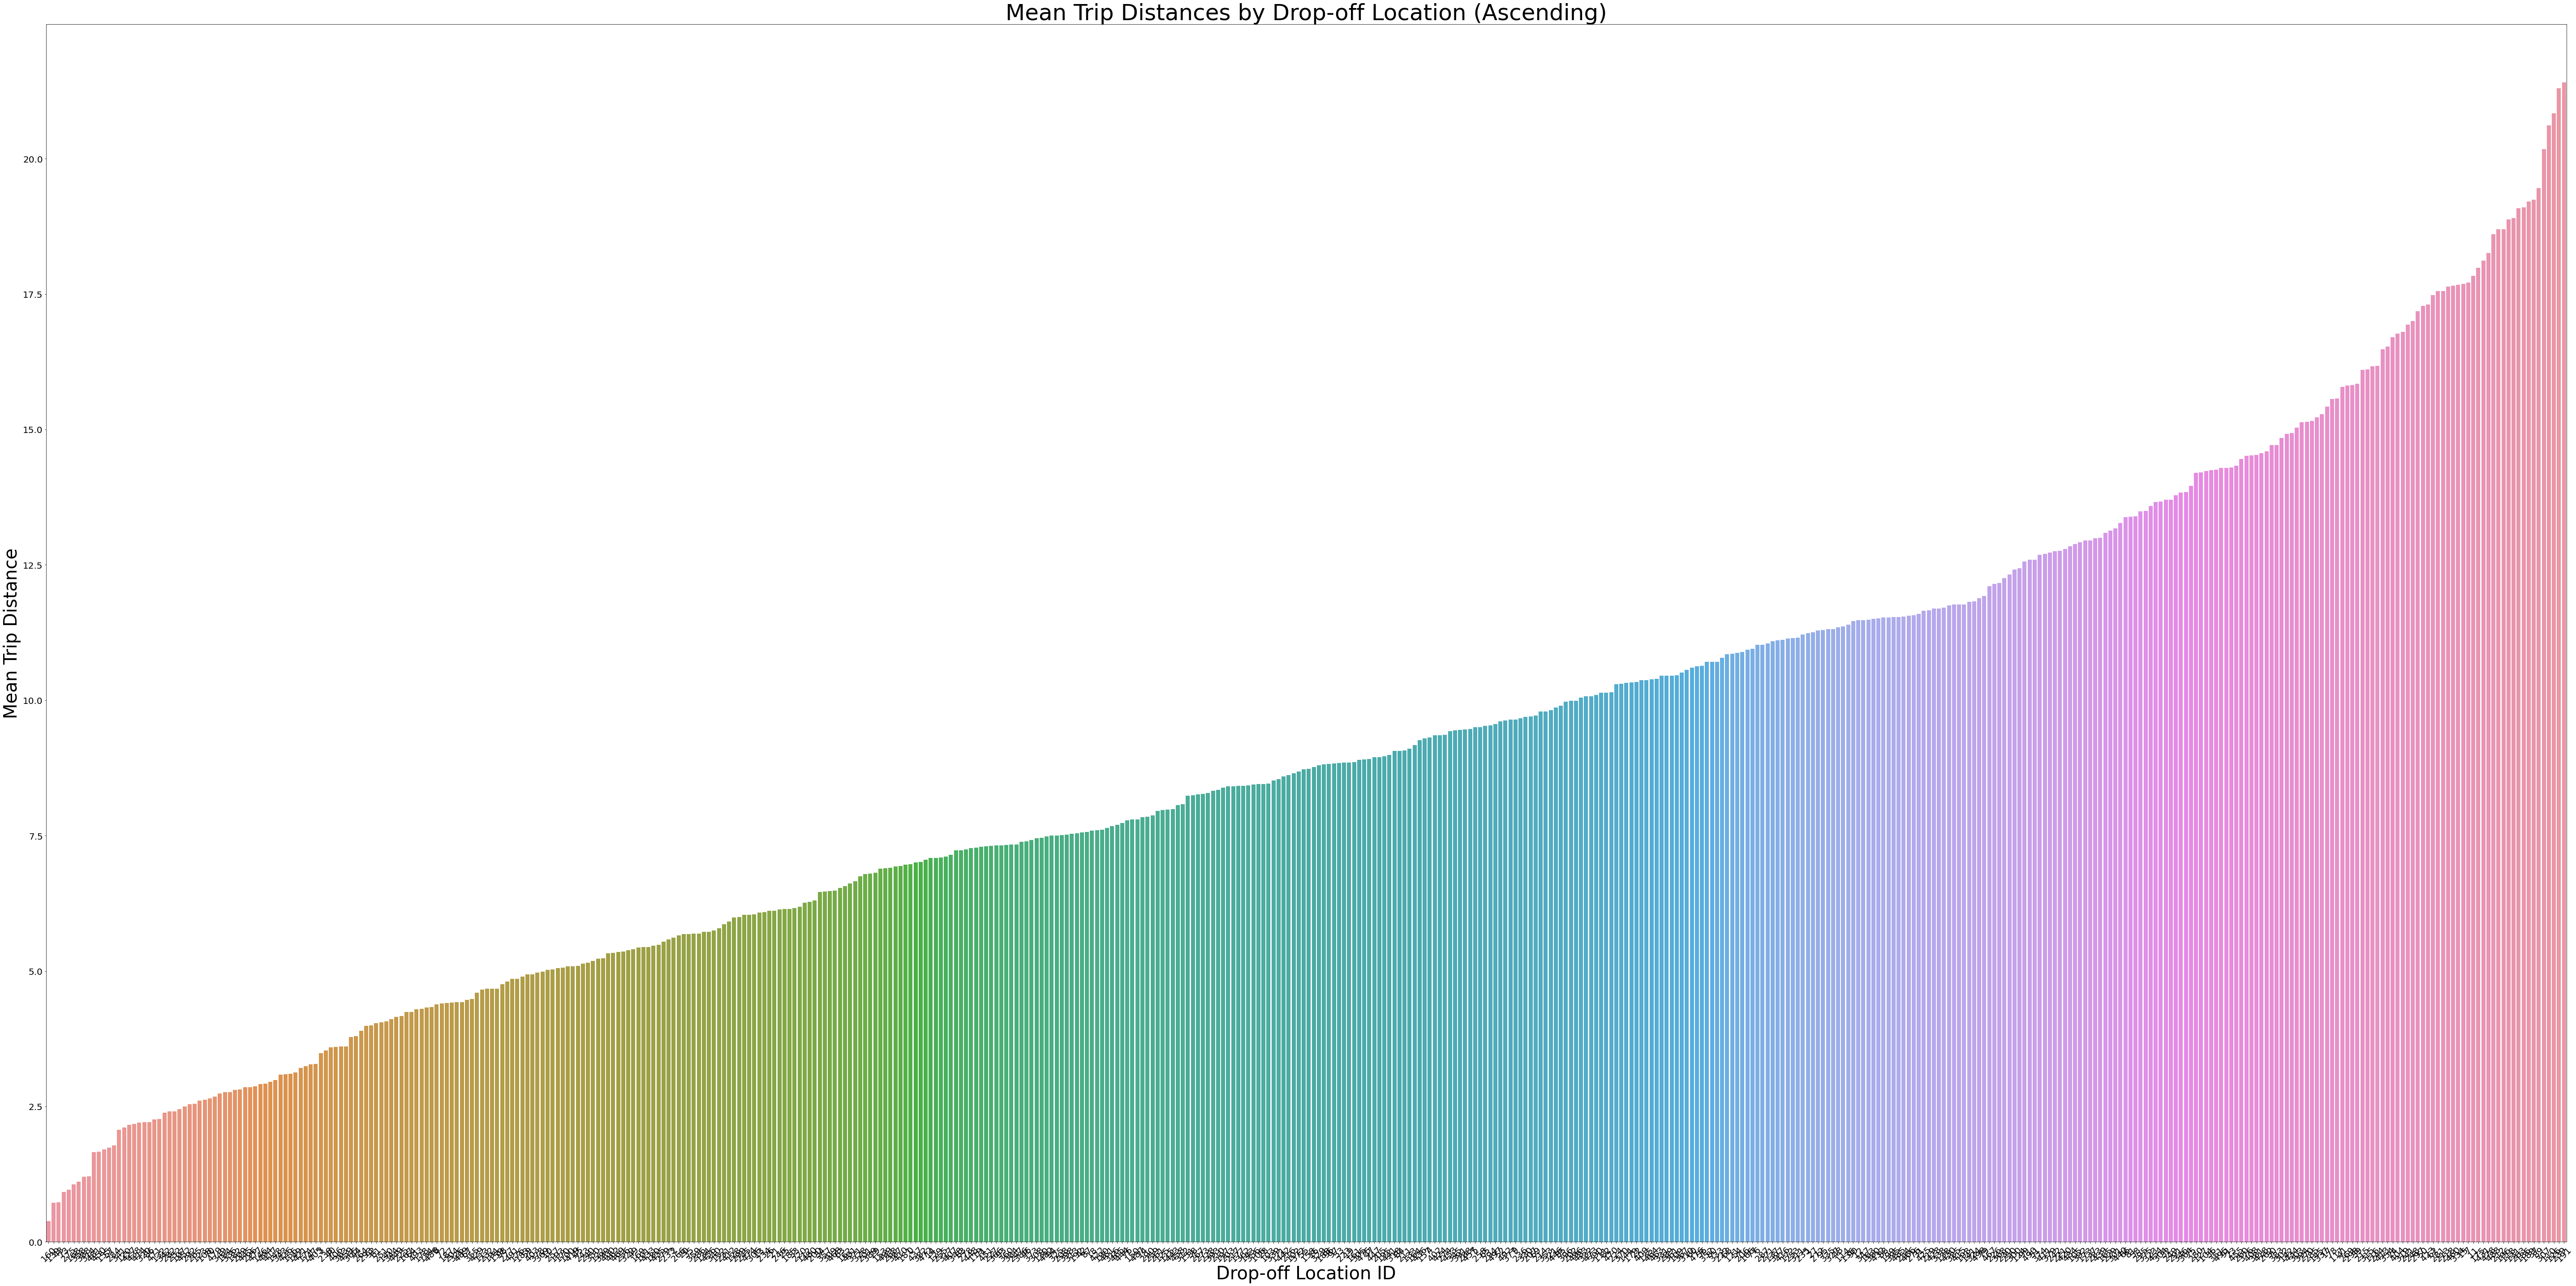

In [119]:

# 1. Generate random points on a 2D plane
np.random.seed(42)
num_points = 1000
coords = np.random.normal(loc=10, scale=5, size=(num_points, 2))

# 2. Calculate Euclidean distances
halfway = num_points // 2
distances = np.linalg.norm(
    coords[:halfway, np.newaxis, :] - coords[halfway:, np.newaxis, :], axis=2
)

# Create DataFrame for easier manipulation
testdf = pd.DataFrame(distances)

# Melt the DataFrame to long format
df_melted = testdf.reset_index().melt(id_vars='index', value_name='distance')
df_melted.columns = ['dropoff_location', 'pickup_location', 'distance']

# 3. Group by drop-off location and calculate mean distance
mean_distances = df_melted.groupby('dropoff_location')['distance'].mean()

# Sort mean distances in ascending order
mean_distances_sorted = mean_distances.sort_values()

# 4. Create bar plot
plt.figure(figsize=(80, 40))
sns.barplot(
    x=mean_distances_sorted.index,
    y=mean_distances_sorted.values,
    order=mean_distances_sorted.index,
)

# Add labels and title
plt.xlabel("Drop-off Location ID", fontsize=40)
plt.ylabel("Mean Trip Distance", fontsize=40)
plt.title("Mean Trip Distances by Drop-off Location (Ascending)", fontsize=50)
plt.xticks(rotation=45, fontsize=20)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=20)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

The curve described by this graph is nearly identical to that of the mean distance traveled by each taxi ride to each drop-off location. This reveals that the drop-off locations in the taxi dataset are evenly distributed geographically. Note, however, that this does not mean that there was an even distrubtion of rides to each drop-off point. Examine this next.

**Histogram of rides by drop-off location**

First, check to whether the drop-off locations IDs are consecutively numbered. For instance, does it go 1, 2, 3, 4..., or are some numbers missing (e.g., 1, 3, 4...). If numbers aren't all consecutive, the histogram will look like some locations have very few or no rides when in reality there's no bar because there's no location. 

In [120]:
# Check if all drop-off locations are consecutively numbered
df['DOLocationID'].max() - len(set(df['DOLocationID'])) 


49

To eliminate the spaces in the historgram that these missing numbers would create, sort the unique drop-off location values, then convert them to strings. This will make the histplot function display all bars directly next to each other. 

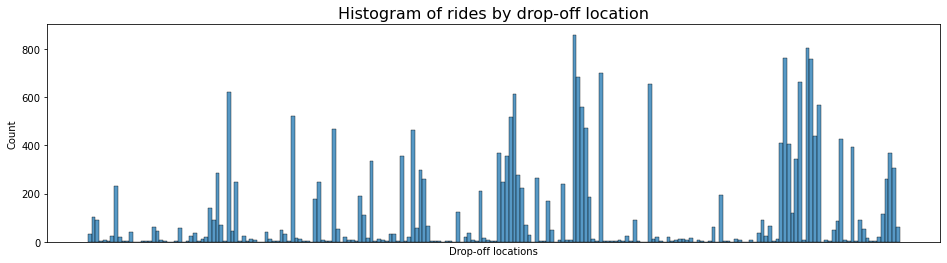

In [121]:

plt.figure(figsize=(16,4))
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()
# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')
# Plot
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);


Notice that out of the 200+ drop-off locations, a disproportionate number of locations receive the majority of the traffic, while all the rest get relatively few trips. It's likely that these high-traffic locations are near popular tourist attractions like the Empire State Building or Times Square, airports, and train and bus terminals. However, it would be helpful to know the location that each ID corresponds with. Unfortunately, this is not in the data.

<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: Execute 

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 4a. Results and evaluation


I have learned .... the highest distribution of trip distances are below 5 miles, but there are outliers all the way out to 35 miles. There are no missing values.

My other questions are .... There are several trips that have a trip distance of "0.0." What might those trips be? Will they impact our model?

My client would likely want to know ... that the data includes dropoff and pickup times. We can use that information to derive a trip duration for each line of data. This would likely be something that will help the client with their model. 

In [124]:
df['trip_duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])

In [125]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday,0 days 00:16:43
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,9.0,0.5,0.5,2.06,0.0,0.3,12.36,March,Saturday,0 days 00:08:00
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,47.5,1.0,0.5,9.86,0.0,0.3,59.16,May,Wednesday,0 days 00:59:38
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,16.0,1.0,0.5,1.78,0.0,0.3,19.58,August,Tuesday,0 days 00:21:59
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,...,9.0,0.0,0.5,0.00,0.0,0.3,9.80,February,Saturday,0 days 00:12:07
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,...,13.0,0.0,0.5,2.75,0.0,0.3,16.55,November,Friday,0 days 00:20:26


### Task 4b. Conclusion



EDA is important because ... 
EDA helps a data professional to get to know the data, understand its outliers, clean its missing values, and prepare it for future modeling.


Visualizations helped me understand ..
That this dataset has some outliers that we will need to make decisions on prior to designing a model.
